[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 18** | Regressão Logística I | Exercício 30

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 06 de junho de 2025.

---

# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import requests

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

response = requests.get(url)
if response.status_code == 200:
    with open("processed_cleveland.data", "wb") as f:
        f.write(response.content)

    df = pd.read_csv("processed_cleveland.data", 
                     names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
else:
    print("Erro ao baixar o arquivo:", response.status_code)

## Descritiva

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
df.replace('?', np.nan, inplace=True)  
df[['ca', 'thal']] = df[['ca', 'thal']].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

C:\Users\earap\AppData\Local\Temp\ipykernel_6460\3879146777.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0], inplace=True)
C:\Users\earap\AppData\Local\Temp\ipykernel_6460\3879146777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## 1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [ ]:
def bivariada_qualitativa(df, resposta, explicativa):
    tabela = pd.crosstab(df[explicativa], df[resposta], margins=True)
    tabela['Proporcao_Evento'] = tabela[1] / tabela['All']
    return tabela

In [11]:
bivariada_sex = bivariada_qualitativa(df, 'num', 'sex')
bivariada_cp = bivariada_qualitativa(df, 'num', 'cp')
bivariada_exang = bivariada_qualitativa(df, 'num', 'exang')

print("Bivariada para sex:")
print(bivariada_sex)
print("\nBivariada para cp:")
print(bivariada_cp)
print("\nBivariada para exang:")
print(bivariada_exang)

Bivariada para sex:
num    0   1   2   3   4  All  Proporcao_Evento
sex                                            
0.0   72   9   7   7   2   97          0.092784
1.0   92  46  29  28  11  206          0.223301
All  164  55  36  35  13  303          0.181518

Bivariada para cp:
num    0   1   2   3   4  All  Proporcao_Evento
cp                                             
1.0   16   5   1   0   1   23          0.217391
2.0   41   6   1   2   0   50          0.120000
3.0   68   9   4   4   1   86          0.104651
4.0   39  35  30  29  11  144          0.243056
All  164  55  36  35  13  303          0.181518

Bivariada para exang:
num      0   1   2   3   4  All  Proporcao_Evento
exang                                            
0.0    141  30  14  12   7  204          0.147059
1.0     23  25  22  23   6   99          0.252525
All    164  55  36  35  13  303          0.181518


## 2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  

Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [12]:
def categorizar_quantitativa(df, resposta, explicativa, num_grupos=5):
    df[f'{explicativa}_cat'] = pd.qcut(df[explicativa], q=num_grupos, duplicates='drop')
    tabela = bivariada_qualitativa(df, resposta, f'{explicativa}_cat')
    
    return tabela

In [13]:
bivariada_age = categorizar_quantitativa(df, 'num', 'age')
print("Bivariada para age:")
print(bivariada_age)

Bivariada para age:
num               0   1   2   3   4  All  Proporcao_Evento
age_cat                                                   
(28.999, 45.0]   47   7   4   4   1   63          0.111111
(45.0, 53.0]     42  11   3   7   1   64          0.171875
(53.0, 58.0]     32  15   8  12   4   71          0.211268
(58.0, 62.0]     13  13  12   5   2   45          0.288889
(62.0, 77.0]     30   9   9   7   5   60          0.150000
All             164  55  36  35  13  303          0.181518


## 3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [14]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
modelo = smf.logit(formula='num ~ sex + cp + trestbps + age', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


In [16]:
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                    num   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.2605
Time:                        09:51:22   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.0

- Sexo: Homens têm um risco significativamente maior de doença cardíaca em comparação com mulheres.

- Tipo de dor no peito (cp): Tipos mais graves de dor no peito estão associados a um maior risco de doença cardíaca.

- Pressão sanguínea em repouso (trestbps): Pressões mais altas estão associadas a um aumento no risco de doença cardíaca.

- Idade (age): Pessoas mais velhas têm um risco maior de doença cardíaca.

## 4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [18]:
df['prob_predita'] = modelo.predict(df)

In [19]:
df['grupo_prob'] = pd.qcut(df['prob_predita'], q=5, duplicates='drop')

In [20]:
calibragem = df.groupby('grupo_prob').agg(
    prob_media=('prob_predita', 'mean'),
    taxa_eventos=('num', 'mean')
).reset_index()

C:\Users\earap\AppData\Local\Temp\ipykernel_6460\836209086.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibragem = df.groupby('grupo_prob').agg(


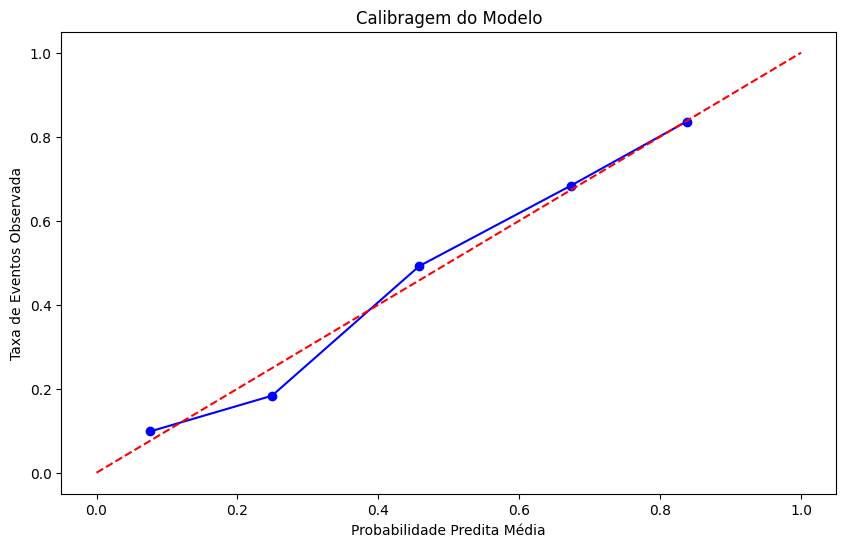

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(calibragem['prob_media'], calibragem['taxa_eventos'], 'bo-')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Probabilidade Predita Média')
plt.ylabel('Taxa de Eventos Observada')
plt.title('Calibragem do Modelo')
plt.show()

## 5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [24]:
df['predicao'] = df['prob_predita'].apply(lambda x: 1 if x > 0.5 else 0)
acuracia = accuracy_score(df['num'], df['predicao'])
print(f"Acurácia: {acuracia}")

Acurácia: 0.7788778877887789


In [25]:
auc = roc_auc_score(df['num'], df['prob_predita'])
gini = 2 * auc - 1
print(f"AUC: {auc}")
print(f"GINI: {gini}")

AUC: 0.8311107211791542
GINI: 0.6622214423583084


In [26]:
fpr, tpr, thresholds = roc_curve(df['num'], df['prob_predita'])
ks = np.max(tpr - fpr)
print(f"KS: {ks}")

KS: 0.5840498333040884


## 6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
Avalie as características do seu modelo (calibragem e acurácia).

In [27]:
modelo_melhorado = smf.logit(formula='num ~ sex + cp + trestbps + age + chol', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.505812
         Iterations 6


In [29]:
print(modelo_melhorado.summary())

                           Logit Regression Results                           
Dep. Variable:                    num   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.2667
Time:                        09:53:45   Log-Likelihood:                -153.26
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.013e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.0947      1.754     -6.896      0.000     -15.532      -8.657
sex            1.9355      0.348      5.570      0.000       1.254       2.617
cp             1.1417      0.170      6.708      0.0

In [30]:
df['prob_predita_melhorada'] = modelo_melhorado.predict(df)
df['grupo_prob_melhorado'] = pd.qcut(df['prob_predita_melhorada'], q=5, duplicates='drop')

In [31]:
calibragem_melhorada = df.groupby('grupo_prob_melhorado').agg(
    prob_media=('prob_predita_melhorada', 'mean'),
    taxa_eventos=('num', 'mean')
).reset_index()

print(calibragem_melhorada)

            grupo_prob_melhorado  prob_media  taxa_eventos
0  (0.009600000000000001, 0.142]    0.070365      0.114754
1                 (0.142, 0.335]    0.251632      0.183333
2                 (0.335, 0.556]    0.455085      0.491803
3                 (0.556, 0.774]    0.676432      0.683333
4                 (0.774, 0.938]    0.840388      0.819672


C:\Users\earap\AppData\Local\Temp\ipykernel_6460\3174763041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibragem_melhorada = df.groupby('grupo_prob_melhorado').agg(


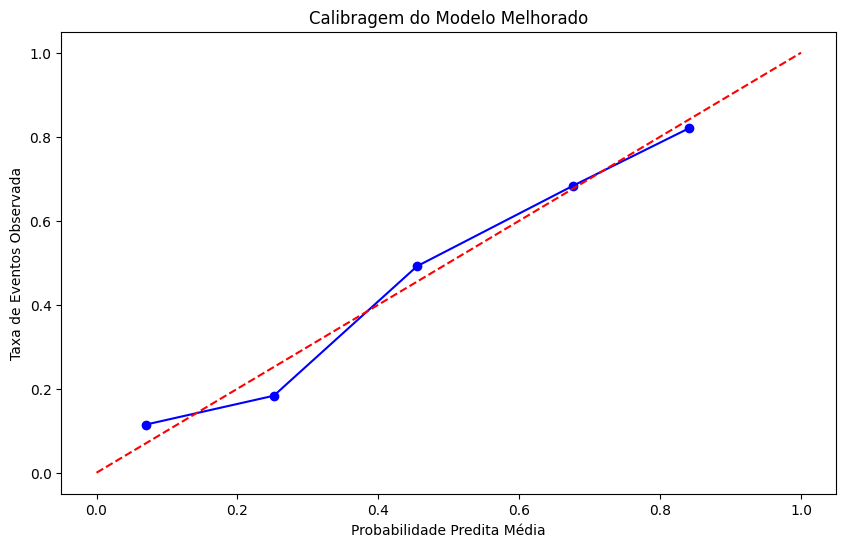

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(calibragem_melhorada['prob_media'], calibragem_melhorada['taxa_eventos'], 'bo-')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Probabilidade Predita Média')
plt.ylabel('Taxa de Eventos Observada')
plt.title('Calibragem do Modelo Melhorado')
plt.show()

In [33]:
df['predicao_melhorada'] = df['prob_predita_melhorada'].apply(lambda x: 1 if x > 0.5 else 0)
acuracia_melhorada = accuracy_score(df['num'], df['predicao_melhorada'])
auc_melhorado = roc_auc_score(df['num'], df['prob_predita_melhorada'])
gini_melhorado = 2 * auc_melhorado - 1
fpr_melhorado, tpr_melhorado, thresholds_melhorado = roc_curve(df['num'], df['prob_predita_melhorada'])
ks_melhorado = np.max(tpr_melhorado - fpr_melhorado)

print(f"Acurácia Melhorada: {acuracia_melhorada}")
print(f"AUC Melhorado: {auc_melhorado}")
print(f"GINI Melhorado: {gini_melhorado}")
print(f"KS Melhorado: {ks_melhorado}")

Acurácia Melhorada: 0.7755775577557755
AUC Melhorado: 0.8346639761361642
GINI Melhorado: 0.6693279522723283
KS Melhorado: 0.5729513949815758
